# ML-3A. Регрессия 

## Вступление 

## Линейная регрессия

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
pwd

'/Users/obiriukov/Documents/GIT/skillfactory_ds/Unit-4. Основные алгоритмы машинного обучения. Часть1'

In [8]:
myData = pd.read_csv('./datasets/mycar.csv')

In [10]:
myData.head()

,Speed,Stopping_dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [11]:
X = myData.iloc[:,:-1].values
Y = myData.iloc[:,1].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3)

In [14]:
from sklearn.linear_model import LinearRegression
myModel = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
myModel.fit(X_train,Y_train) #обучаем модель на обучающих данных

LinearRegression()

In [15]:
y_pred = myModel.predict(X_test)
y_pred

array([78.0679485 , 61.94255794, 41.78581974, 53.87986266, 57.9112103 ,
       25.66042918, 74.03660086, 37.7544721 , 21.62908155, 29.69177682,
       45.81716738, 17.59773391, -2.55900429, 61.94255794, 29.69177682])

##  Ошибки в линейной регрессии

In [16]:
import pandas as pd               # библиотека для работы с таблицами
import numpy as np                # библиотека для работы с матрицами

In [17]:
y_happy = [4,20,110,15,23]
y_happy_pred = [5,15,100,9,21]

In [18]:
from sklearn import metrics  # подгружаем метрики

In [19]:
#Вычисляем MAE:

MAE = metrics.mean_absolute_error(y_happy, y_happy_pred)

print(MAE)

4.8


In [20]:
#Вычисляем MSE:

MSE = metrics.mean_squared_error(y_happy, y_happy_pred)
print(MSE)

33.2


In [21]:
#Вычисляем коэффициент детерминации:

R_2 = metrics.r2_score(y_happy, y_happy_pred)
print(R_2)

0.9774247946472284


## Линейная регрессия. Предобработка

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
data = pd.read_csv('./datasets/flats.csv', sep =';')
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

In [26]:
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

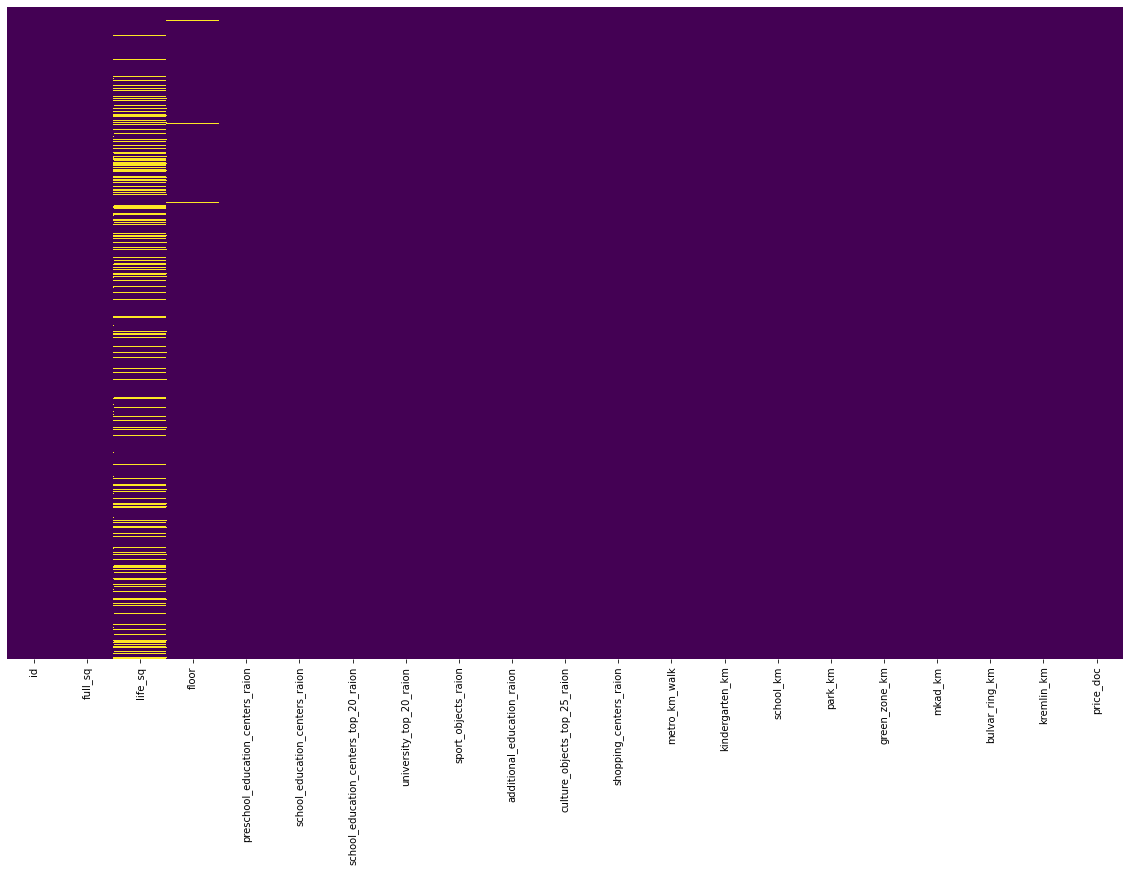

In [27]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

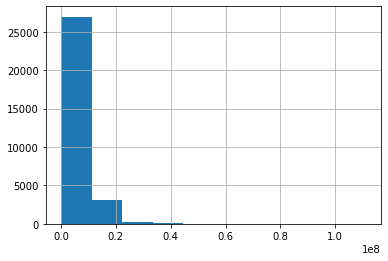

In [28]:
data.price_doc.hist();

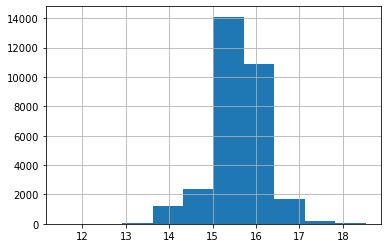

In [29]:
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist();

<AxesSubplot:>

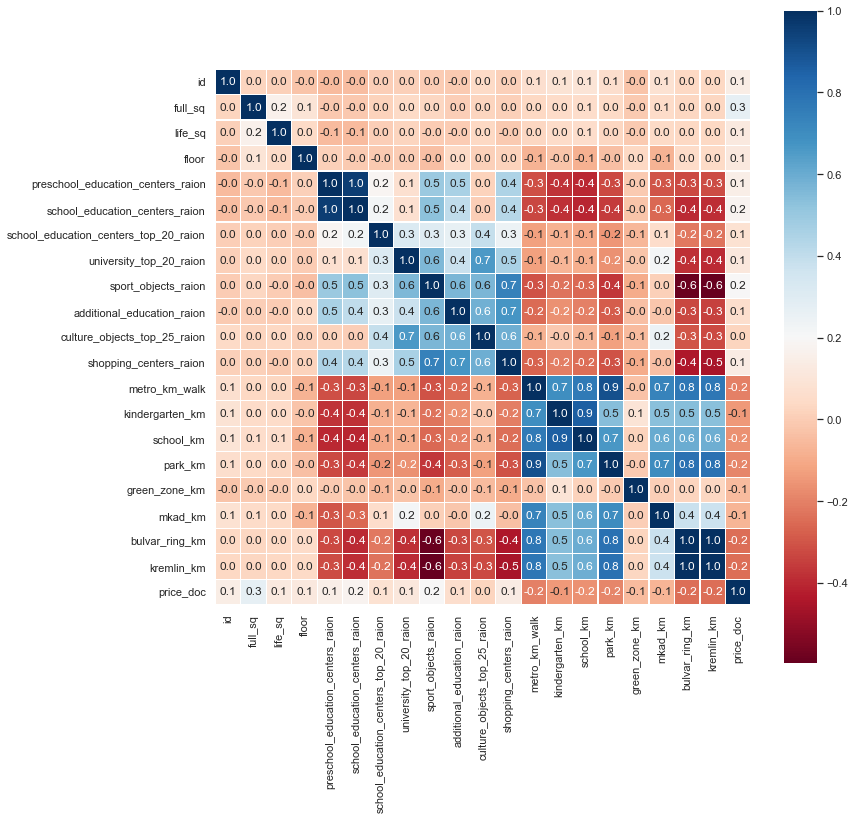

In [30]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

## Линейная регрессия. Практика №1